# Vox Chart 8 Redesign

###  by Constance McCarney

Chart 8 features a heatmap of the United States overlayed with information about which states have more gun laws. While this is more visually appealing, the eye cannot readily determine the relationship between more gun laws and lower rates of gun deaths. The original source for the image comes from a private research group and I was not able to determine where that organization had gathered the information from to generate this graphic.

Additional online sleuthing did return information on gun laws in US states over time which had been compiled and primarily coded by the researcher Michael Siegel. Using the CDC's WONDAR tool, I then collected information on all deaths where the underlying cause was a firearm. The data covers all 50 states from 2001 to 2016. CDC information included the District of Columbia, but was not part of the gun laws dataset.

## Data

In [1]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
import pandas as pd
import numpy as np
%pylab inline

%autosave 0

Populating the interactive namespace from numpy and matplotlib


Autosave disabled


In [2]:
laws = pd.read_csv('State Gun Laws.csv')

In [3]:
laws.head()

,state,year,age18longgunpossess,age18longgunsale,age21handgunpossess,age21handgunsale,age21longgunpossess,age21longgunsale,age21longgunsaled,alcoholism,...,universal,universalh,universalpermit,universalpermith,violent,violenth,violentpartial,waiting,waitingh,lawtotal
0,Alabama,2001,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,11
1,Alaska,2001,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,Arizona,2001,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
3,Arkansas,2001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
4,California,2001,0,1,0,1,0,0,0,1,...,1,1,1,1,1,1,1,1,1,86


In [4]:
laws = laws[['state','year','lawtotal']]
laws.columns = ['State', 'Year', 'Laws']

In [5]:
laws.State.nunique()

50

In [6]:
laws.head()

,State,Year,Laws
0,Alabama,2001,11
1,Alaska,2001,7
2,Arizona,2001,13
3,Arkansas,2001,13
4,California,2001,86


In [7]:
deaths = pd.read_csv('CDC_GunDeaths.csv')

In [8]:
deaths.head()

,State,Year,Deaths,Population,Crude Rate,Age Adjusted Rate
0,Alabama,2001,737,4467634,16.49643,16.44073
1,Alabama,2002,724,4480089,16.16039,16.10151
2,Alabama,2003,765,4503491,16.98682,16.86283
3,Alabama,2004,679,4530729,14.98655,14.82905
4,Alabama,2005,736,4569805,16.10572,15.99722


In [9]:
deaths.State.nunique()

51

In [10]:
df = deaths.merge(laws)
df.head()

,State,Year,Deaths,Population,Crude Rate,Age Adjusted Rate,Laws
0,Alabama,2001,737,4467634,16.49643,16.44073,11
1,Alabama,2002,724,4480089,16.16039,16.10151,11
2,Alabama,2003,765,4503491,16.98682,16.86283,11
3,Alabama,2004,679,4530729,14.98655,14.82905,11
4,Alabama,2005,736,4569805,16.10572,15.99722,11


In [11]:
df.State.nunique()

50

## New Visuals

The key information that is to be conveyed here is the relationship between the number of gun laws a state has and the rate of gun deaths per 100,000 people. A regression plot conveys this relationship clearly, showing that has the number of gun laws increase, the rate of gun deaths decrease. The first plot shows this for each state/year combination, whereas the second plot takes the average rates and average number of laws for each state. I am still exploring which is better at conveying this message.

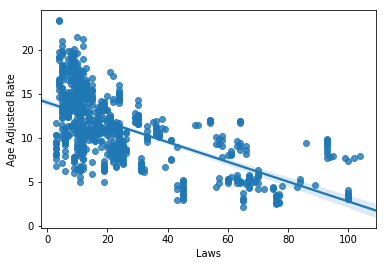

In [12]:
sns.regplot(x='Laws', y='Age Adjusted Rate', data=df)

In [13]:
df_means = df.groupby('State').mean().reset_index()

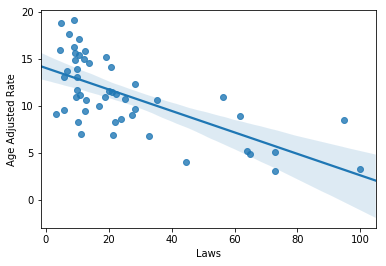

In [14]:
sns.regplot(x='Laws', y='Age Adjusted Rate', data=df_means)

## References

CDC National Center for Health Statistics (NCHS). Underlying Cause of Death 1999-2016. Saved request: https://wonder.cdc.gov/controller/saved/D76/D35F899

Lopez, George. "America’s unique gun violence problem, explained in 17 maps and charts." Vox.com. Accessed May 5, 2018.
https://www.vox.com/policy-and-politics/2017/10/2/16399418/us-gun-violence-statistics-maps-charts

Siegel, Michael. State Firearm Laws. State Laws by Year. Accessed May 5, 2018. https://www.statefirearmlaws.org/table.html